In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
for col in df.columns:
    print(col,":","\n" )
    print(df[col].unique())

gender : 

['female' 'male']
race_ethnicity : 

['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education : 

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch : 

['standard' 'free/reduced']
test_preparation_course : 

['none' 'completed']
math_score : 

[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading_score : 

[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing_score :

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
numeric_features=[col for col in df.columns if df[col].dtype!='object']
categorical_features=[col for col in df.columns if df[col].dtype=='object']

In [11]:
print(categorical_features)
print(numeric_features)

['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
['math_score', 'reading_score', 'writing_score']


In [12]:
df['total score']=df['math_score']+df['reading_score']+df['writing_score']

df['average']=df['total score']/3

In [13]:
reading_full=len(df[df['reading_score']==100])
math_full=len(df[df['math_score']==100])
writing_full=len(df[df['writing_score']==100])

print('No of students with full marks in MATHS:',math_full)
print('No of Students with full marks in writing:',writing_full)
print('No of students with full marks in Reading:',reading_full)

No of students with full marks in MATHS: 7
No of Students with full marks in writing: 14
No of students with full marks in Reading: 17


In [14]:
reading_less_20=len(df[df['reading_score']<=20])
math_less_20=len(df[df['math_score']<=20])
writing_less_20=len(df[df['writing_score']<=20])

print('No of students with less marks than 20 in MATHS:',math_less_20)
print('No of Students with less marks than 20 in writing:',writing_less_20)
print('No of students with less marks than 20 in Reading:',reading_less_20)

No of students with less marks than 20 in MATHS: 4
No of Students with less marks than 20 in writing: 3
No of students with less marks than 20 in Reading: 1


In [15]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


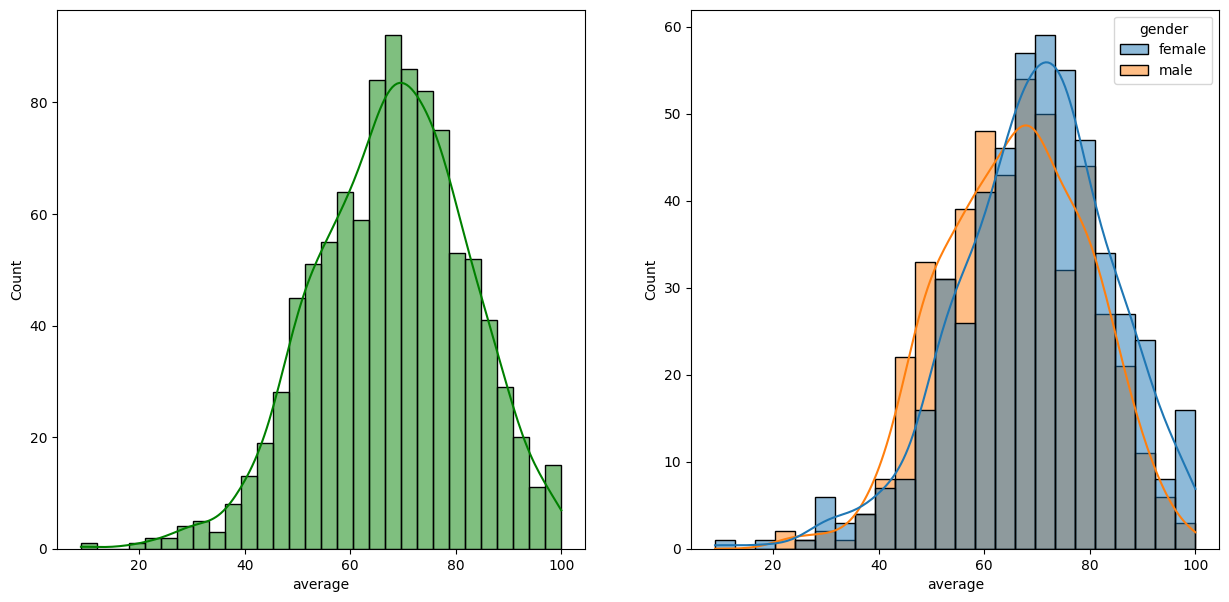

In [16]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

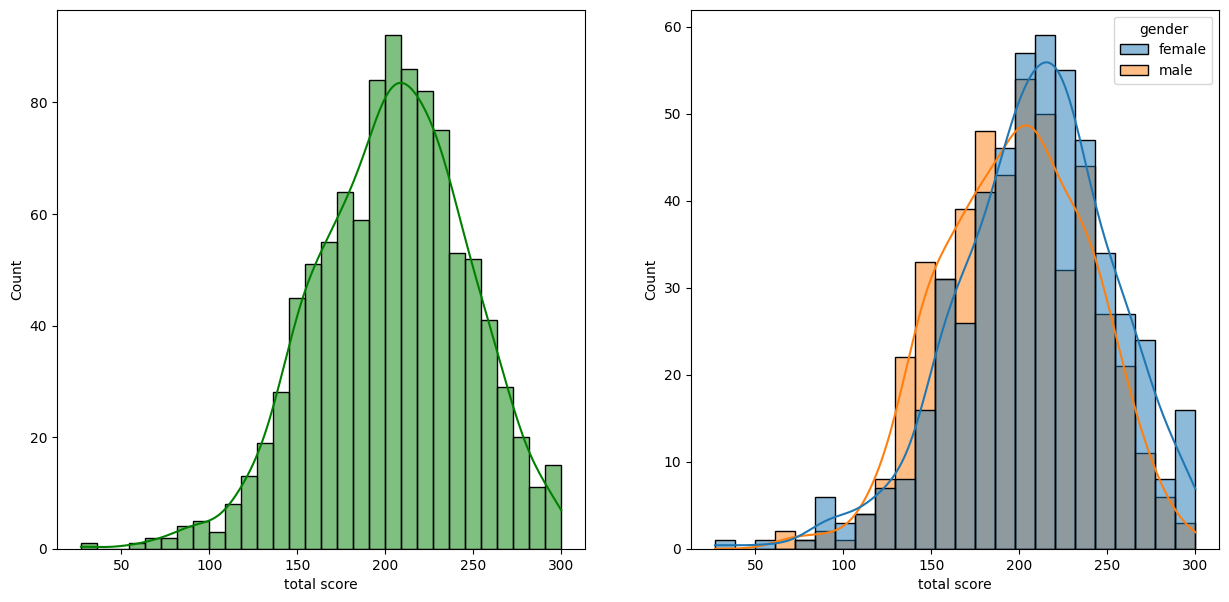

In [17]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

- Female students tend to perform well than male students

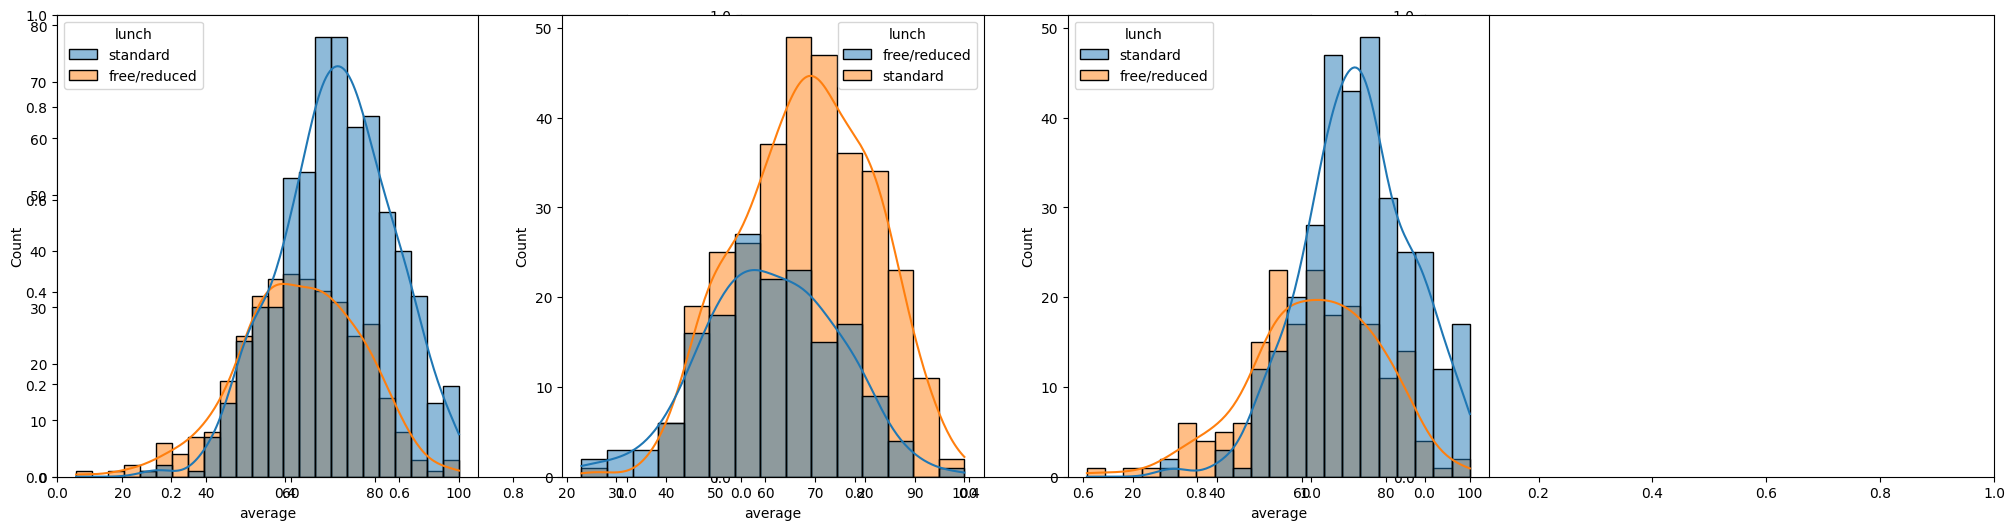

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='lunch')
plt.show()

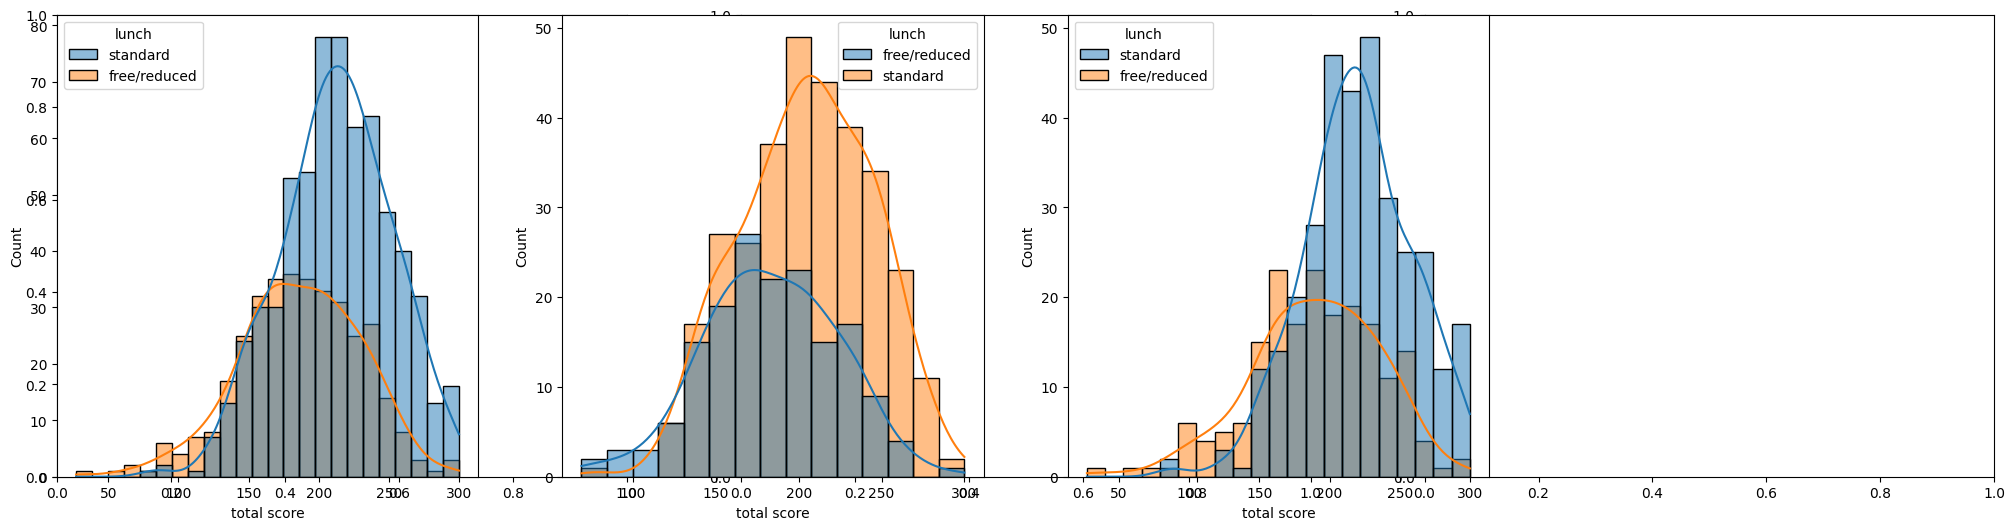

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='total score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='male'],x='total score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='female'],x='total score',kde=True,hue='lunch')
plt.show()

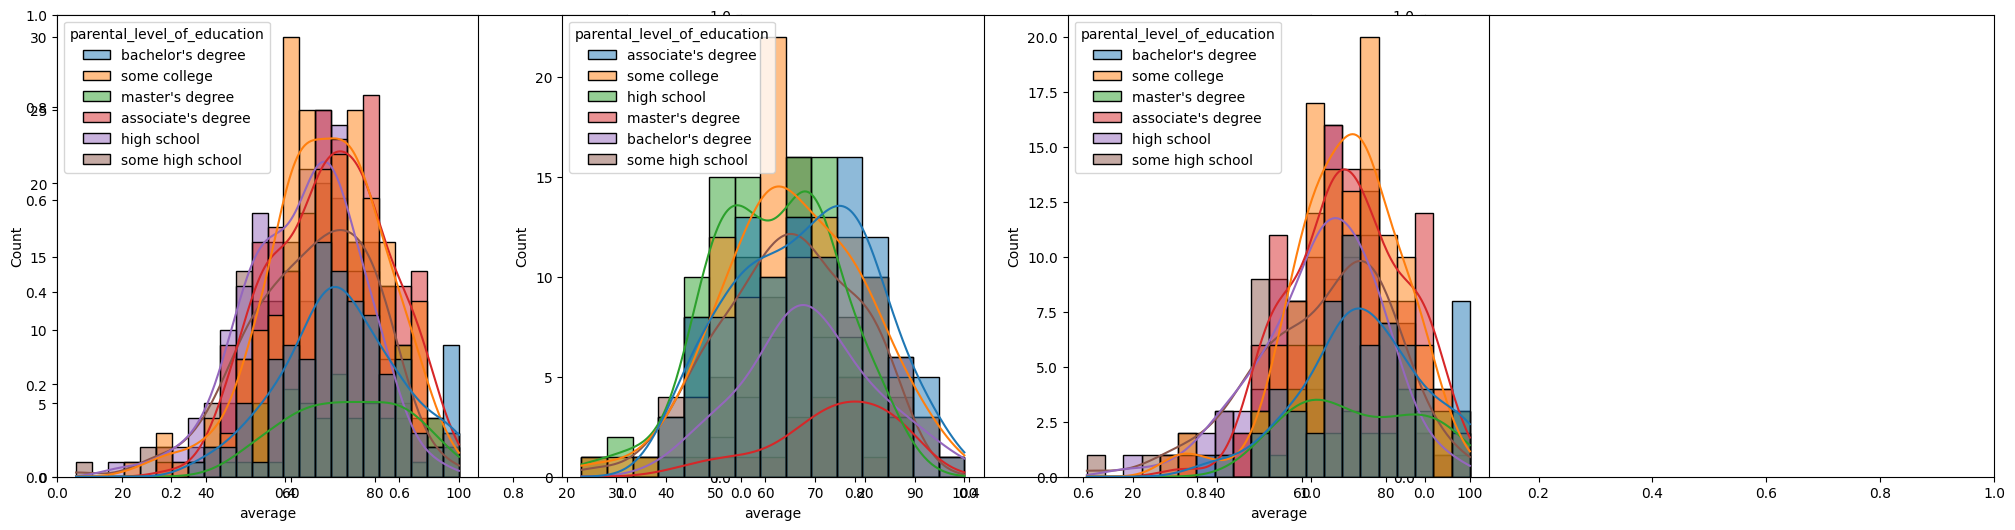

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax=sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

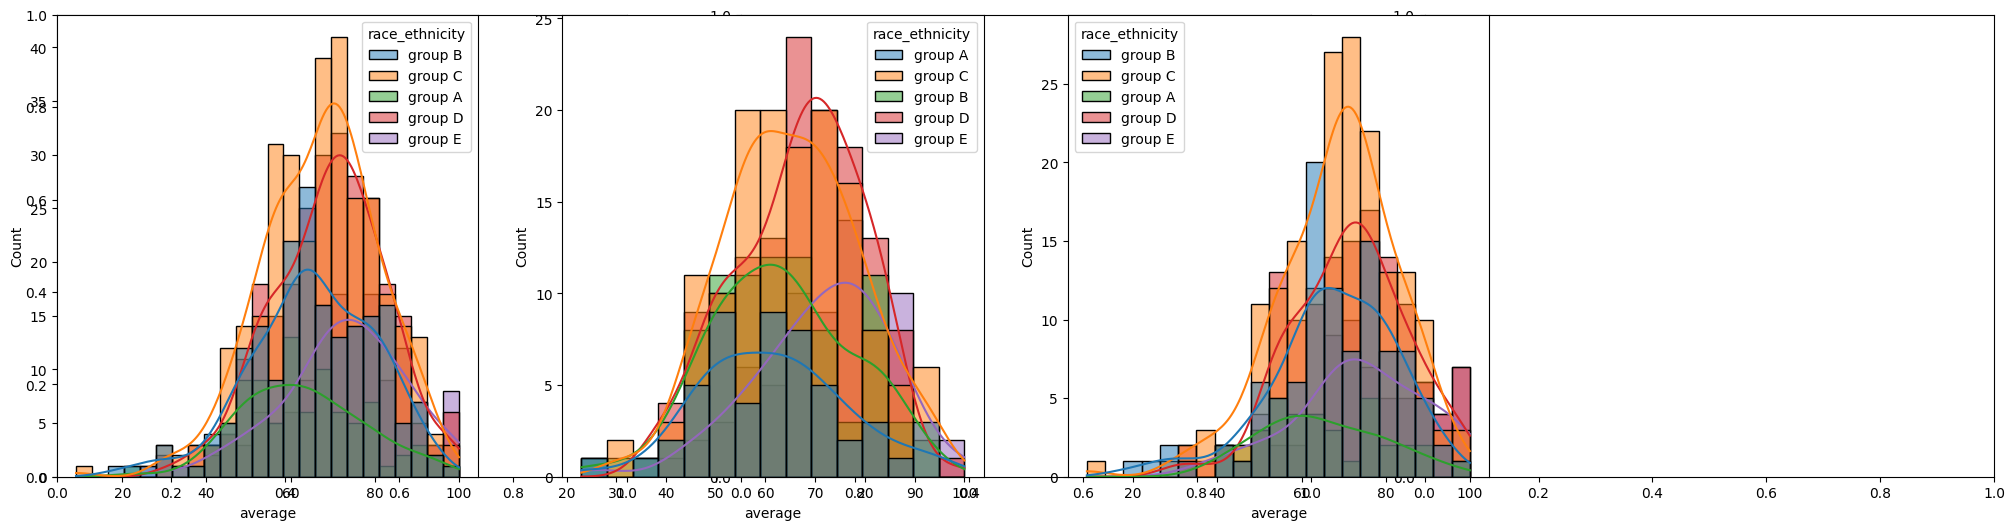

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax=sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='race_ethnicity')
plt.show()

- group A and B tends to perform poorly in exams

<Axes: title={'center': 'Writing score'}, ylabel='writing_score'>

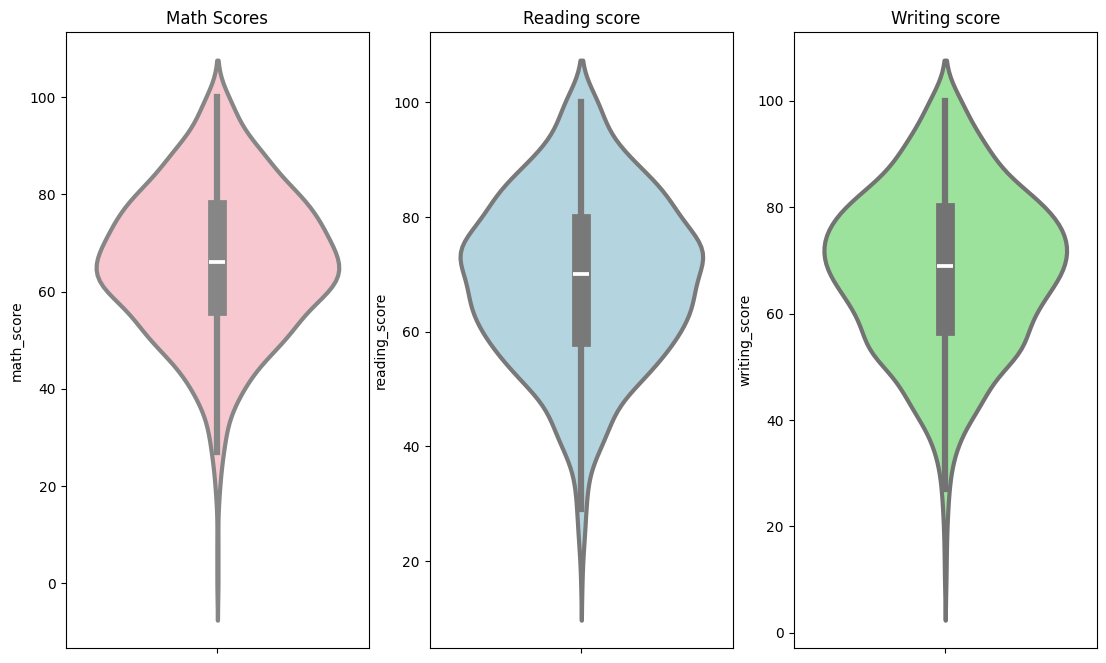

In [22]:
plt.figure(figsize=(18,8))

plt.subplot(1,4,1)
plt.title('Math Scores')

sns.violinplot(y='math_score',data=df,color='pink',linewidth=3)

plt.subplot(1,4,2)
plt.title('Reading score')
sns.violinplot(y='reading_score',data=df,color='lightblue',linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing score')
sns.violinplot(y='writing_score',data=df,color='lightgreen',linewidth=3)

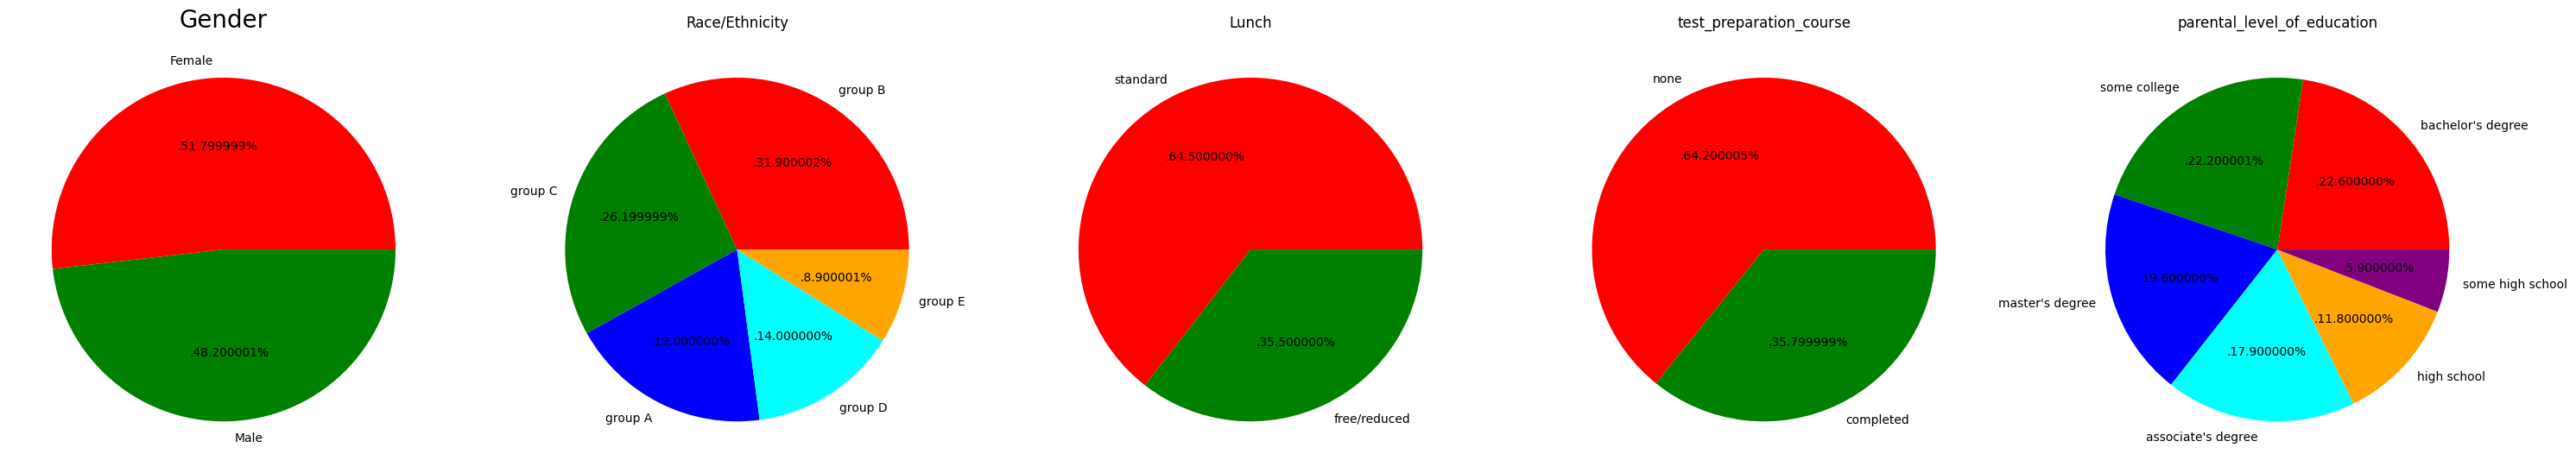

In [ ]:
plt.rcParams['figure.figsize']=(30,12)
plt.subplot(1,5,1)

size=df['gender'].value_counts()
labels='Female','Male'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels='group B' ,'group C', 'group A', 'group D', 'group E'
color=['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Race/Ethnicity')
plt.axis('off')

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels='standard', 'free/reduced'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Lunch')
plt.axis('off')

plt.subplot(1,5,4)
size=df['test_preparation_course'].value_counts()
labels='none' ,'completed'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('test_preparation_course')
plt.axis('off')

plt.subplot(1,5,5)
size=df['parental_level_of_education'].value_counts()
labels="bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school' ,'some high school'
color=['red','green','blue','cyan','orange','purple']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('parental_level_of_education')
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show(
    
)